In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

#Import time module
import time

# Import linregress
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key

# Basic url for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | sambava
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | abalak
Processing Record 11 of Set 1 | yulara
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | amarpur
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | tigre
Processing Record 18 of Set 1 | fairbanks
Processing Record 19 of Set 1 | mangan
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | comodoro rivadavia
Processing Record 23 of Set 1 | barentsburg


Processing Record 38 of Set 4 | chicama
Processing Record 39 of Set 4 | tura
Processing Record 40 of Set 4 | yellowknife
Processing Record 41 of Set 4 | balkanabat
Processing Record 42 of Set 4 | kazachinskoye
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | bubaque
Processing Record 45 of Set 4 | svetlyy
Processing Record 46 of Set 4 | paradwip
City not found. Skipping...
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | taywarah
Processing Record 50 of Set 4 | grand gaube
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | fort nelson
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | haines junction
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | artyk
City not found. Skipping...
Processing Record 8 of Set 5 | mwinilunga
Processing Record 9 of Set 5 |

Processing Record 26 of Set 8 | severomuysk
Processing Record 27 of Set 8 | ngunguru
Processing Record 28 of Set 8 | meulaboh
Processing Record 29 of Set 8 | severnyy
Processing Record 30 of Set 8 | hoghiz
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | taloqan
Processing Record 33 of Set 8 | kaitangata
Processing Record 34 of Set 8 | itarema
Processing Record 35 of Set 8 | college
Processing Record 36 of Set 8 | gao
Processing Record 37 of Set 8 | hay river
Processing Record 38 of Set 8 | nosy varika
Processing Record 39 of Set 8 | san patricio
Processing Record 40 of Set 8 | aitape
Processing Record 41 of Set 8 | bontang
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | lichinga
Processing Record 44 of Set 8 | ostrovnoy
Processing Record 45 of Set 8 | henties bay
Processing Record 46 of Set 8 | tabou
Processing Record 47 of Set 8 | inirida
Processing Record 48 of Set 8 | san quintin
Processing Record 49 of Set 8 

Processing Record 10 of Set 12 | tucurui
Processing Record 11 of Set 12 | hirado
Processing Record 12 of Set 12 | caruray
Processing Record 13 of Set 12 | marshall
Processing Record 14 of Set 12 | kshenskiy
Processing Record 15 of Set 12 | rundu
Processing Record 16 of Set 12 | banjar
Processing Record 17 of Set 12 | rocha
Processing Record 18 of Set 12 | san mateo del mar
Processing Record 19 of Set 12 | walvis bay
Processing Record 20 of Set 12 | rila
Processing Record 21 of Set 12 | rumonge
Processing Record 22 of Set 12 | stornoway
Processing Record 23 of Set 12 | cadiz
Processing Record 24 of Set 12 | klang
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | lincoln
Processing Record 27 of Set 12 | murray bridge
Processing Record 28 of Set 12 | khao yoi
Processing Record 29 of Set 12 | shegaon
Processing Record 30 of Set 12 | kasempa
Processing Record 31 of Set 12 | boa vista
Processing Record 32 of Set 12 | bandarbeyla
Processing Record 33 of Set 12 | l

In [8]:
len(city_data)

559

In [9]:
# Convert array of dictionaries to pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,29.86,93,90,35.68,AR,2021-08-07 22:32:20
1,Sambava,-14.2667,50.1667,68.27,88,59,8.23,MG,2021-08-07 22:32:21
2,Punta Arenas,-53.1500,-70.9167,35.71,80,0,26.46,CL,2021-08-07 22:32:21
3,Severo-Kurilsk,50.6789,156.1250,56.03,70,68,8.01,RU,2021-08-07 22:32:21
4,Mataura,-46.1927,168.8643,37.47,94,100,0.96,NZ,2021-08-07 22:31:25
5,Chuy,-33.6971,-53.4616,62.20,86,7,6.44,UY,2021-08-07 22:32:22
6,Ilulissat,69.2167,-51.1000,46.42,57,20,3.44,GL,2021-08-07 22:32:22
7,Upernavik,72.7868,-56.1549,40.68,95,100,9.95,GL,2021-08-07 22:32:23
8,Puerto Ayora,-0.7393,-90.3518,76.96,83,68,8.99,EC,2021-08-07 22:31:35
9,Abalak,58.1286,68.5944,55.47,99,100,2.84,RU,2021-08-07 22:32:23


In [10]:

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-08-07 22:32:20,-54.8000,-68.3000,29.86,93,90,35.68
1,Sambava,MG,2021-08-07 22:32:21,-14.2667,50.1667,68.27,88,59,8.23
2,Punta Arenas,CL,2021-08-07 22:32:21,-53.1500,-70.9167,35.71,80,0,26.46
3,Severo-Kurilsk,RU,2021-08-07 22:32:21,50.6789,156.1250,56.03,70,68,8.01
4,Mataura,NZ,2021-08-07 22:31:25,-46.1927,168.8643,37.47,94,100,0.96
5,Chuy,UY,2021-08-07 22:32:22,-33.6971,-53.4616,62.20,86,7,6.44
6,Ilulissat,GL,2021-08-07 22:32:22,69.2167,-51.1000,46.42,57,20,3.44
7,Upernavik,GL,2021-08-07 22:32:23,72.7868,-56.1549,40.68,95,100,9.95
8,Puerto Ayora,EC,2021-08-07 22:31:35,-0.7393,-90.3518,76.96,83,68,8.99
9,Abalak,RU,2021-08-07 22:32:23,58.1286,68.5944,55.47,99,100,2.84


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City Data Dataframe into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant field from dataframe (latitude, max temp, humidity, cloudiness, wind)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Get today's date in seconds
today = time.strftime("%x")
today

'08/07/21'

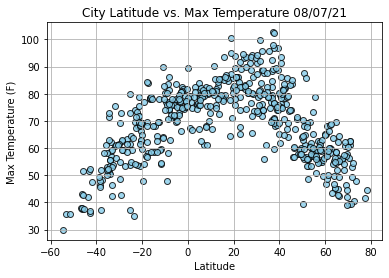

In [14]:
# Build scatter plot for latitude vs max temp
plt.subplots(facecolor="white")
plt.scatter(lats, max_temps, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

plt.show()

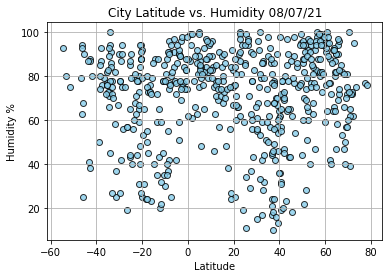

In [15]:
# Build scatter plot for latitude vs humidity
plt.subplots(facecolor="white")
plt.scatter(lats, humidity, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Humidity " + today)
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

plt.show()

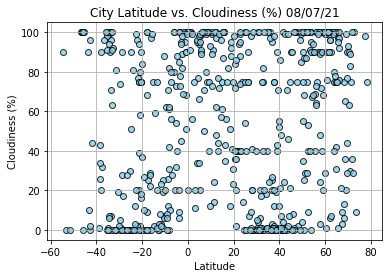

In [16]:
# Build scatter plot for latitude vs cloudiness
plt.subplots(facecolor="white")
plt.scatter(lats, cloudiness, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

plt.show()

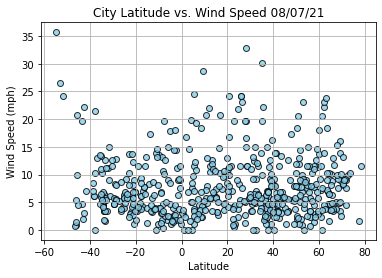

In [17]:
# Build scatter plot for latitude vs wind speed
plt.subplots(facecolor="white")
plt.scatter(lats, wind_speed, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Wind Speed " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

plt.show()

In [18]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calc the regression line "y values" from slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames using .loc
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)] # northern hem have postive lat (i.e. 0 - 90)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] # southern hem have negative lat (i.e. -90 - 0)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Severo-Kurilsk,RU,2021-08-07 22:32:21,50.6789,156.1250,56.03,70,68,8.01
6,Ilulissat,GL,2021-08-07 22:32:22,69.2167,-51.1000,46.42,57,20,3.44
7,Upernavik,GL,2021-08-07 22:32:23,72.7868,-56.1549,40.68,95,100,9.95
9,Abalak,RU,2021-08-07 22:32:23,58.1286,68.5944,55.47,99,100,2.84
11,Torbay,CA,2021-08-07 22:32:24,47.6666,-52.7314,70.68,84,75,17.27


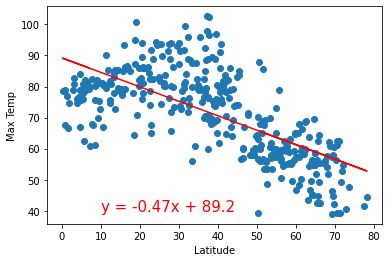

In [24]:
# Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

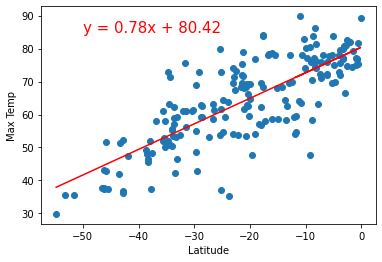

In [31]:
# Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

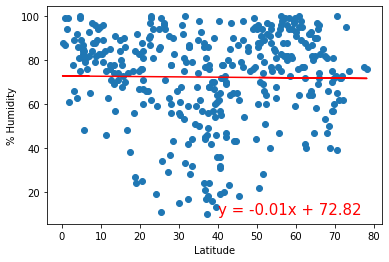

In [32]:
# Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

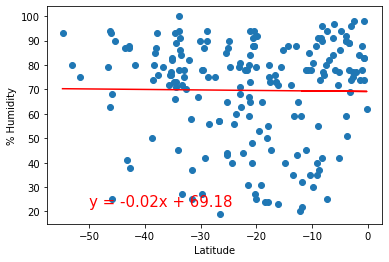

In [38]:
# Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,22))

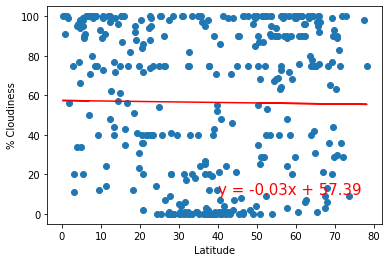

In [41]:
# Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(40,10))

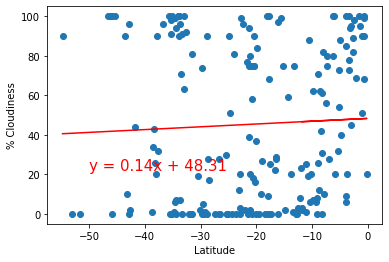

In [42]:
# Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,22))

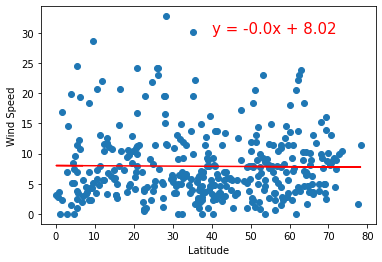

In [47]:
# Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,30))

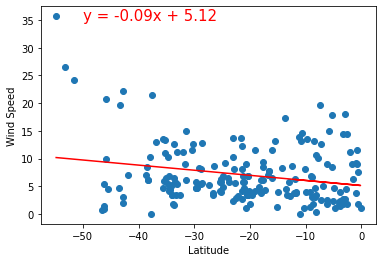

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))